# Testing the API

We will now test the API we just created.  
Here are some digits from the MNIST dataset that we will use to test the API.

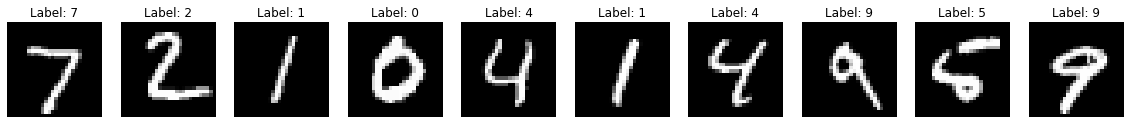

In [1]:
import matplotlib.pyplot as plt
import torchvision.datasets as datasets

# Load an example image from MNIST
mnist = datasets.MNIST(root='../data', train=False, download=True)
# a sublopt to show 10 images horizontally large size
fig, ax = plt.subplots(1,10, figsize=(20,10))
for i in range(10):
    image, label = mnist[i]
    ax[i].imshow(image, cmap='gray')
    ax[i].set_title(f"Label: {label}")
    ax[i].axis('off')

We will use the `requests` library to send HTTP requests to the API.
We need to specify the URL of the API endpoint and the HTTP method to use (POST in our case).  
We also need to specify the data to send in the request body. This data will be sent as a JSON string. We can use the `json` parameter in the `requests` library to automatically convert a dictionary to a JSON string before sending the request.  
Let's try calling the API with on the 10th first images we showed earlier.

In [3]:
import requests
import io

for i in range(10):
    image, label = mnist[i]
    # Convert image to bytes
    img_binary = io.BytesIO()
    image.save(img_binary, format="PNG")
    # Send request to the API
    response = requests.post("http://127.0.0.1:5000/predict", data=img_binary.getvalue())
    print("Predicted Label:", response.json()["prediction"], "True Label:", label)

Predicted Label: 7 True Label: 7
Predicted Label: 2 True Label: 2
Predicted Label: 1 True Label: 1
Predicted Label: 0 True Label: 0
Predicted Label: 4 True Label: 4
Predicted Label: 1 True Label: 1
Predicted Label: 4 True Label: 4
Predicted Label: 9 True Label: 9
Predicted Label: 5 True Label: 5
Predicted Label: 9 True Label: 9


We requested the api one image at a time. As you may already know, neural networks are much more efficient when they are fed with a batch of images.  
Modify the `mnist_api.py` by adding a new route `/batch_predict` that will accept a batch of images and return a batch of predictions and test it with the following code.

In [9]:
images = []
labels = []

for i in range(10):
    image, label = mnist[i]
    labels.append(label)

    # Convert image to bytes
    img_binary = io.BytesIO()
    image.save(img_binary, format="PNG")
    images.append(('images[]', (f"image_{i}.png", img_binary.getvalue(), 'image/png')))

# Send request to the API for batch prediction
response = requests.post("http://127.0.0.1:5000/batch_predict", files=images)
predictions = response.json()["predictions"]

for i, (pred, true_label) in enumerate(zip(predictions, labels)):
    print(f"Image {i+1} - Predicted Label:", pred, "| True Label:", true_label)


Image 1 - Predicted Label: 7 | True Label: 7
Image 2 - Predicted Label: 2 | True Label: 2
Image 3 - Predicted Label: 1 | True Label: 1
Image 4 - Predicted Label: 0 | True Label: 0
Image 5 - Predicted Label: 4 | True Label: 4
Image 6 - Predicted Label: 1 | True Label: 1
Image 7 - Predicted Label: 4 | True Label: 4
Image 8 - Predicted Label: 9 | True Label: 9
Image 9 - Predicted Label: 5 | True Label: 5
Image 10 - Predicted Label: 9 | True Label: 9
